<a href="https://colab.research.google.com/github/natalia-kurbakova/Baruch-Data-Challenge/blob/main/add_to_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
#loading data
train = pd.read_csv("train updated 04132022.csv")

#set option to display columns and rows of the dataframe fully
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#creatig a dataframe
train = pd.DataFrame(train)

In [8]:
train['charging_rate_lag4'] = train['charging_rate_lag4'].abs()
train['discharging_rate_lag4'] = train['discharging_rate_lag4'].abs()
train['discharging_rate_lag3'] = train['discharging_rate_lag3'].abs()
train['charging_rate_lag3'] = train['charging_rate_lag3'].abs()

# VIZUALIZATION

In [23]:
#changing the datetime format in Date Deployed --- adding dashes to date!
train['Date Deployed'] = pd.to_datetime(train['Date Deployed']).dt.strftime('%Y-%m-%d')
years=[]
months=[]

for dates in train['Date Deployed']:
    dates[1].lstrip('0')
    dates = dates.split("-")
    year = int(dates[0])
    month = int(dates[1])
    years.append(year)
    months.append(month)

train['Year Deployed'] = years
train['Month Deployed'] = months

In [62]:
# last record == april 1st 2021
# calculate age of battery in months: 2021 - year deployed, times 12, plus 4 (april is the fourth month), substract month deployed
train['age_of_battery'] = (12*(2021 - train['Year Deployed']) + 4) - train['Month Deployed']
train.sample(n=5)

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed,Year Deployed,Month Deployed,age_of_battery
27965,36149,30.91,20.40,11.24,32.19,0.166667,0.246667,50.87,38.92,14.88,65.91,0.153333,-0.093333,0,False,6.92,5.72,17.06,24.78,4.35,4.22,4.66,4.40,41.33,81.21,5.19,6.16,34.14,70.34,31.48,48.31,4.65,3.69,4.67,4.19,0.520000,1.253333,-2.026667,-0.103333,0.306667,-0.106667,-0.616667,63.875000,63.812500,3.125000,0.937500,354.359375,353.133750,17.989375,30.204375,4160.187500,14.857143,48.193750,4/1/21,2019-09-01,2019,9,19
1145,9811,5.57,18.64,4.95,41.23,0.716667,0.270000,6.14,27.30,3.21,51.56,0.030000,0.616667,1,False,27.37,45.93,5.00,5.54,14.59,28.77,5.42,5.74,6.29,5.59,34.72,66.86,4.98,3.24,6.54,7.26,4.40,4.13,6.19,9.71,0.046667,1.633333,-0.480000,-0.036667,0.040000,0.950000,-0.053333,83.187500,83.250000,56.500000,4.812500,376.988750,374.228125,14.348750,21.651250,4189.312500,10.777778,36.000000,4/1/21,2019-11-14,2019,11,17
7137,21399,12.34,20.18,29.55,4.86,0.080000,0.006667,16.05,29.24,55.89,4.28,0.026667,0.000000,0,True,6.19,5.27,6.19,5.95,4.41,4.13,4.67,3.97,4.86,3.77,4.41,4.14,6.16,5.06,5.02,5.21,4.78,4.13,5.03,5.82,0.783333,-1.763333,-0.520000,0.043333,0.400000,-0.923333,-0.783333,96.900000,96.900000,12.400000,0.966667,346.755667,345.657667,13.892667,22.416333,4160.866667,20.388889,36.309000,4/1/21,2019-09-26,2019,9,19
12368,29147,5.06,43.07,35.96,29.24,0.010000,0.906667,3.11,85.27,74.44,44.72,0.100000,-0.503333,0,True,35.62,73.32,33.92,52.82,27.12,44.56,5.68,5.81,5.27,5.14,5.82,24.87,28.94,46.57,4.84,3.74,16.87,24.23,6.08,5.93,0.016667,-0.700000,1.083333,-0.406667,0.016667,-0.486667,-0.310000,67.052632,66.947368,19.578947,4.473684,355.022105,352.891579,19.183684,32.425263,4162.684211,25.666667,51.608947,4/1/21,2019-09-15,2019,9,19
39517,41159,5.01,6.12,34.02,22.25,1.286667,-0.046667,3.44,4.31,67.62,36.67,2.250000,-0.006667,0,False,4.64,3.55,4.81,4.01,4.94,3.53,4.65,4.10,4.47,4.13,30.80,53.57,17.18,23.00,4.45,4.21,4.96,4.49,4.65,3.71,0.023333,-0.040000,-0.156667,-0.013333,0.003333,-0.113333,0.036667,108.470588,108.588235,31.117647,0.705882,365.322941,363.818824,11.012941,15.741176,4175.941176,9.416667,26.754118,4/1/21,2019-09-05,2019,9,19


In [101]:
train['delta_discharging_rate'] = (train['discharging_rate_lag3'] - train['discharging_rate_lag4'])/train['discharging_rate_lag4']

In [102]:
train['delta_charging_rate'] = (train['charging_rate_lag3'] - train['charging_rate_lag4'])/train['charging_rate_lag4']

In [26]:
#devices that failed
failed_true = train[train['fail_7']==1]

In [63]:
fail_7_count = failed_true.count().max()
fail_7_count

9401

In [46]:
age_categories = train['age_of_battery'].unique()
age_categories

array([18, 19, 17, 20, 16, 15, 14])

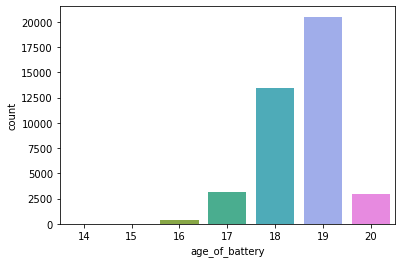

In [77]:
sns.set_palette('RdBu_r')
sns.countplot(data=train, x='age_of_battery')

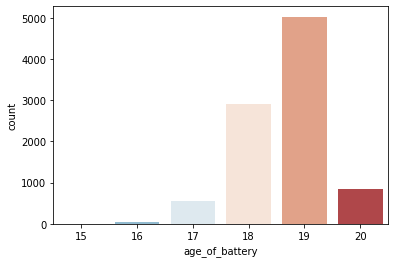

In [78]:
sns.countplot(data=failed_true, x='age_of_battery')
plt.show()

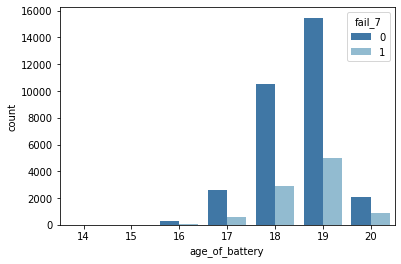

In [79]:
sns.countplot(data=train, x='age_of_battery', hue='fail_7')

In [105]:
#devices that didn't fail yest - same size as failed_true
failed_false = train[train['fail_7']==0].sample(n=fail_7_count)

In [106]:
df_different_size = pd.concat([failed_true,failed_false], ignore_index=True)

In [74]:
abnormal_cycle_time = train[train['charge_cycle_time_below_12']==True]
normal_cycle_time = train[train['charge_cycle_time_below_12']==False]

abnormal_cycle_time_failed = abnormal_cycle_time[abnormal_cycle_time['fail_7']==1]
#abnormal_cycle_time_failed.sample(n=15)
#abnormal_cycle_time.groupby('fail_7').count()
#normal_cycle_time.groupby('fail_7').count()

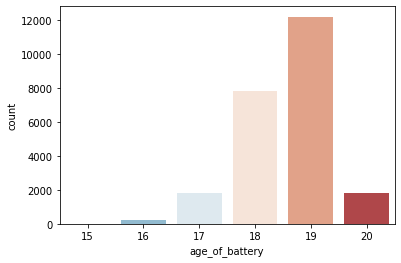

In [80]:
sns.countplot(data=abnormal_cycle_time, x='age_of_battery')
plt.show()

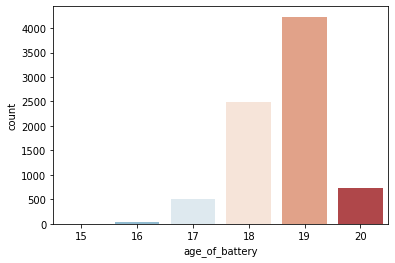

In [81]:
sns.countplot(data=abnormal_cycle_time_failed, x='age_of_battery')
plt.show()

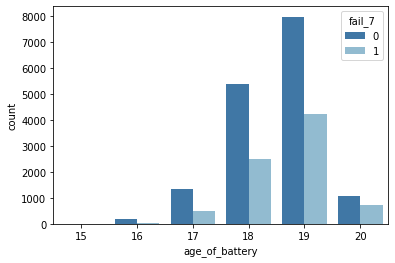

In [82]:
sns.countplot(data=abnormal_cycle_time, x='age_of_battery', hue='fail_7')
plt.show()

In [107]:
custom_palette1 = ['#FF6900','#00D084']
custom_palette2 = ['#FCB900','#0693E3']

**for failed devices, the discharging rate decreases from 4 to 3 days pior to april first - see two plots below**

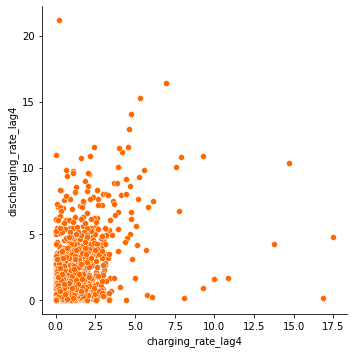

In [118]:
sns.set_palette(custom_palette1)
sns.relplot(data=failed_true, x='charging_rate_lag4', y='discharging_rate_lag4', kind='scatter')
plt.show()

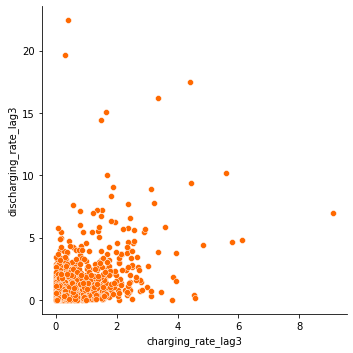

In [119]:
sns.relplot(data=failed_true, x='charging_rate_lag3', y='discharging_rate_lag3', kind='scatter')
plt.show()

**the difference in the charging and discharging rate from 4 to 3 days prior to april first is greater with devices that didn't fail yet - charging rate up to 1000 with discharging rate delta up to 2000. devices that did fail experience less fluctuations is (dis-)charging rate difference.**

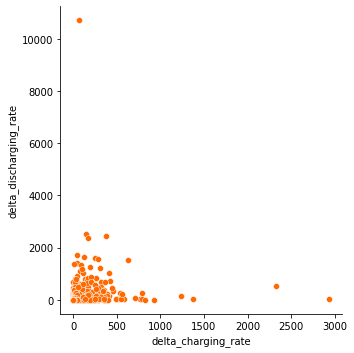

In [121]:
sns.relplot(data=failed_false, x='delta_charging_rate', y='delta_discharging_rate', kind='scatter')
plt.show()

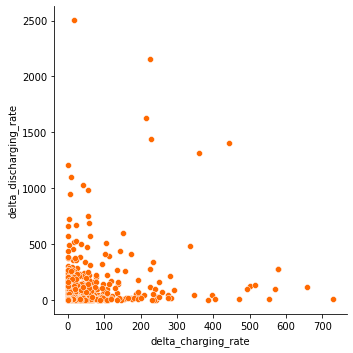

In [120]:
sns.relplot(data=failed_true, x='delta_charging_rate', y='delta_discharging_rate', kind='scatter')
plt.show()

**names of new dataframes: train (-added two columns showing differences between charging and discharging rates for lag4-lag 3, added month deployed column, modified datetime format), df_different_size**

## Additional: attempting to handle datetime format and columns - still not considered by model

In [111]:
#creating lists of columns we want to drop
cols_avg_time_charging = []
cols_avg_time_discharging = []
for i in range(5,15): 
    col_charging = "avg_time_charging_lag" + str(i)
    cols_avg_time_charging.append(col_charging)
    col_discharging = "avg_time_discharging_lag" + str(i)
    cols_avg_time_discharging.append(col_discharging)

cols_charging_rate = []
for i in range(5,8):
    col_charging_rate = "charging_rate_lag" + str(i)
    cols_charging_rate.append(col_charging_rate)

cols_discharging_rate = []    
for i in range(5,9):
    col_discharging_rate = "discharging_rate_lag" + str(i)
    cols_discharging_rate.append(col_discharging_rate)

#combining them into one list
list_of_field_names_with_nan = []
list_of_field_names_with_nan.extend(cols_discharging_rate)
list_of_field_names_with_nan.extend(cols_charging_rate)
list_of_field_names_with_nan.extend(cols_avg_time_discharging)
list_of_field_names_with_nan.extend(cols_avg_time_charging)


#modifying the dataframe by dropping the said columns
train = train.drop(columns=list_of_field_names_with_nan)

In [112]:


#creating new dataframe with reordered columns for better data understanding
new_df = train.reindex(columns=['deviceid', 'avg_volt_change_charging', 'avg_volt_change_discharging', 'max_voltage_day', 
                                'fail_7', 'charge_cycle_time_below_12', 'Date Deployed', 'Month Deployed' 
                                'avg_time_charging_lag4', 'avg_time_charging_lag3', 'avg_time_charging_lag2', 'avg_time_charging_lag1', 
                                'avg_time_discharging_lag4', 'avg_time_discharging_lag3', 'avg_time_discharging_lag2', 'avg_time_discharging_lag1', 
                                'charging_rate_lag4', 'charging_rate_lag3', 
                                'discharging_rate_lag4', 'discharging_rate_lag3',
                                'avg_time_charging', 'avg_time_discharging', 'cycle_time', 'chargecycles', 'dischargecycles', 'piececount', 'total_off_time', 'number_times_restart'])

In [113]:
#changing the datetime format in Date Deployed --- adding dashes to date!
train['Date Deployed'] = pd.to_datetime(train['Date Deployed']).dt.strftime('%Y-%m-%d')
years=[]
months=[]

for dates in train['Date Deployed']:
    dates[1].lstrip('0')
    dates = dates.split("-")
    year = int(dates[0])
    month = int(dates[1])
    years.append(year)
    months.append(month)

train['Year Deployed'] = years
train['Month Deployed'] = months